loading data from a csv file

In [3]:
import pandas as pd

filepath = r"C:\Users\shepherd.runesu\Desktop\Projects\Bank-Customer-Attrition-analysis\data\Bank_Customer_Attrition_Insights_Data.csv"
customer_df = pd.read_csv(filepath)
print(customer_df.head(1))   #testing the loading of the dataset

   RowNumber  CustomerId Surname  CreditScore Geography  Gender  Age  Tenure  \
0          1    15598695  Fields          619    France  Female   42       2   

   Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0      0.0              1          1               1        101348.88       1   

   Complain  Satisfaction Score Card Type  Point Earned  
0         1                   2   DIAMOND           464  


CASE 1a - Checking Summary statistics for numerical columns

RESULT - Just a quick look into that dataset age column, With a mean age of 39 years and a standard deviation of 10 years, the age distribution is likely to be approximately normal (assuming no skew). This means most ages in the dataset will fall within one standard deviation of the mean—between 29 and 49 years (39 ± 10). If we were to apply the empirical rule (68-95-99.7 rule), around 68% of the ages should fall between 29 and 49 years (1 standard deviation), 95% should fall between 19 and 59 years (2 standard deviation), and about 99.7% would fall between 9 and 69 years (3 standard deviation). I am expecting some outliers given that I can already see max age of 92 years. 

In [4]:
# Summary statistics for numerical columns
customer_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


CASE 1b - Counting categorical columns

RESULT - A quick look into the dataset's categorical variables: approximately 20% left the bank and 80% remained, 50% customers are in France 25% in Germany 25% in Spain, 55% are males while 45% are females. 

In [7]:
customer_df['Exited'].value_counts(normalize=True), customer_df['Geography'].value_counts(normalize=True), customer_df['Gender'].value_counts(normalize=True), customer_df["Card Type"].value_counts(normalize=True)

(Exited
 0    0.7962
 1    0.2038
 Name: proportion, dtype: float64,
 Geography
 France     0.5014
 Germany    0.2509
 Spain      0.2477
 Name: proportion, dtype: float64,
 Gender
 Male      0.5457
 Female    0.4543
 Name: proportion, dtype: float64,
 Card Type
 DIAMOND     0.2507
 GOLD        0.2502
 SILVER      0.2496
 PLATINUM    0.2495
 Name: proportion, dtype: float64)

CASE2a: Age distribution

RESULT: Observing outliers soon after around the age of 63 (supported by the 99.7% rule - 3 standard deviations) with the oldest customer being 92 years old. The ages are not questionable for us to think it may have been data entry errors. There is need to come up with a new column so as to be able to segment our customers as young aged, middle aged and old aged to better understand them.

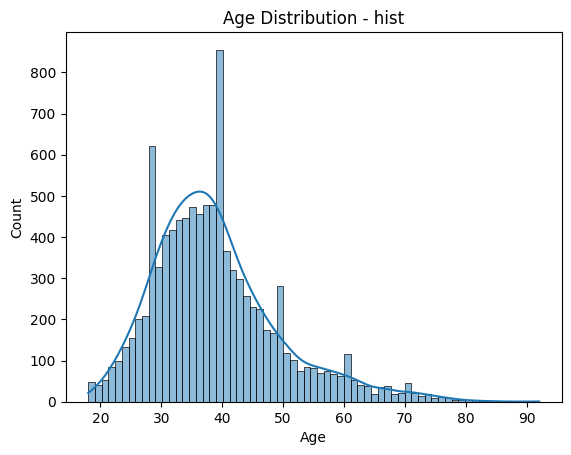

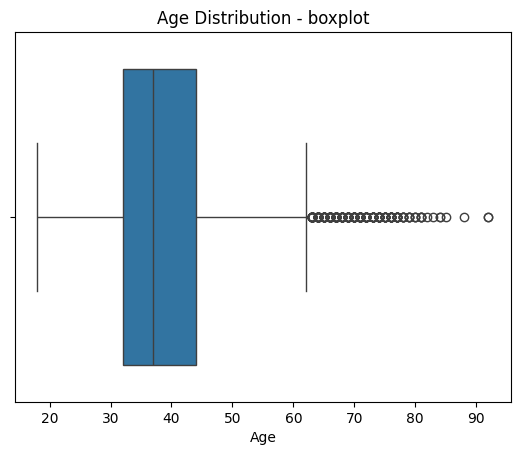

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Age
sns.histplot(customer_df['Age'], kde=True)
plt.title('Age Distribution - hist')
plt.show()

# Boxplot of Age
sns.boxplot(x=customer_df['Age'])
plt.title('Age Distribution - boxplot')
plt.show()

CASE2b: Tenure distribution

RESULT: no outliers

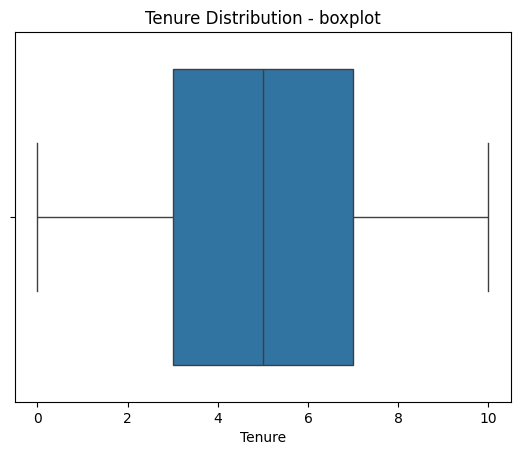

In [13]:
# Boxplot of Tenure
sns.boxplot(x=customer_df['Tenure'])
plt.title('Tenure Distribution - boxplot')
plt.show()

CASE2c: Balance distribution

RESULT: Over 3500 customers have balances around zero dollars, there is need to add a new column which categorizes customers based on their bank balances, this should help the bank identify the most risky customers. 

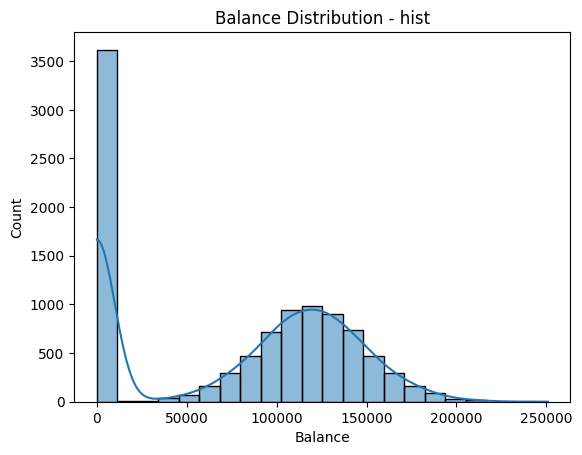

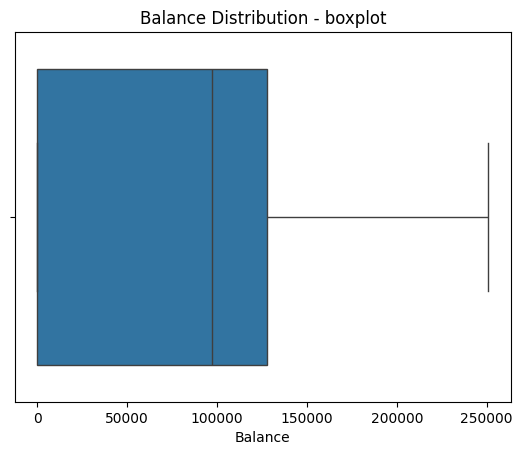

In [14]:
# Histogram of Balance
sns.histplot(customer_df['Balance'], kde=True)
plt.title('Balance Distribution - hist')
plt.show()

# Boxplot of Balance
sns.boxplot(x=customer_df['Balance'])
plt.title('Balance Distribution - boxplot')
plt.show()

CASE2d: NumOfProducts distribution

RESULT: There is an outlier with 4 number of products they use offered by the bank. This looks normal.

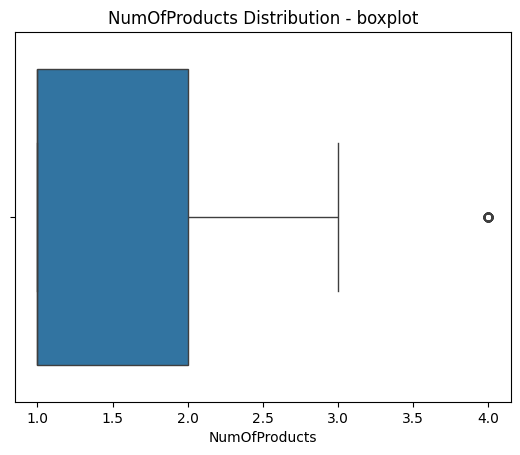

In [16]:
# Boxplot of NumOfProducts
sns.boxplot(x=customer_df['NumOfProducts'])
plt.title('NumOfProducts Distribution - boxplot')
plt.show()

CASE2e: Point Earned distribution

RESULT: some uniform distribution here. 

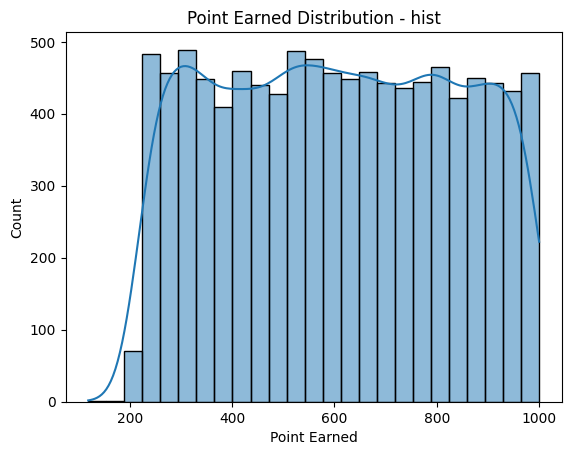

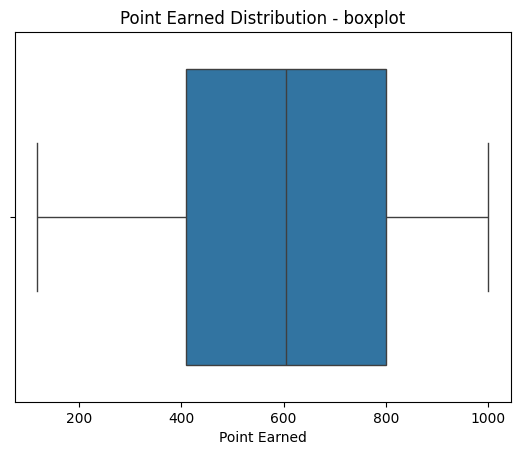

In [17]:
# Histogram of Point Earned
sns.histplot(customer_df['Point Earned'], kde=True)
plt.title('Point Earned Distribution - hist')
plt.show()

# Boxplot of Point Earned
sns.boxplot(x=customer_df['Point Earned'])
plt.title('Point Earned Distribution - boxplot')
plt.show()

CASE3: Churn analysis

RESULT: About 20% left the bank and 80% are still with the bank. The bank lost most of its customers who were in France and Germany. Most of its customers are from France. 

C:\Users\shepherd.runesu\AppData\Local\Temp\ipykernel_6828\2717509977.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=customer_df, palette="coolwarm")


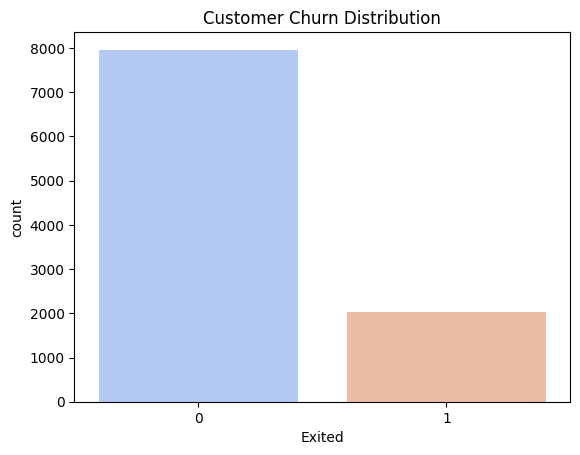

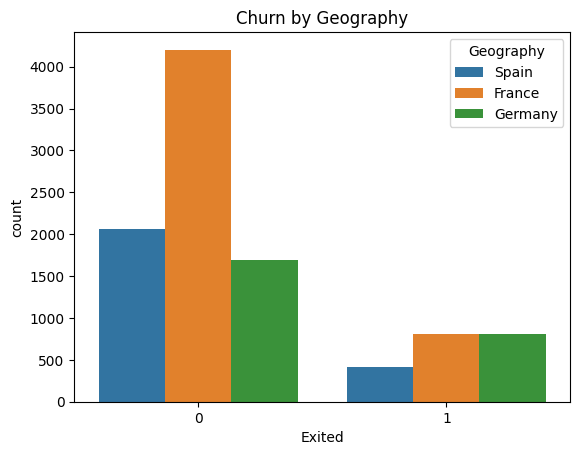

In [19]:
# Churn rate
sns.countplot(x='Exited', data=customer_df, palette="coolwarm")
plt.title('Customer Churn Distribution')
plt.show()

# Churn distribution by Geography
sns.countplot(x='Exited', hue='Geography', data=customer_df)
plt.title('Churn by Geography')
plt.show()

CASE4a: Feature Relationships - Correlation matrix

RESULT: There is a weak negative correlation between (balance & NumOfProducts) and (Point Earned and NumOfProducts). 

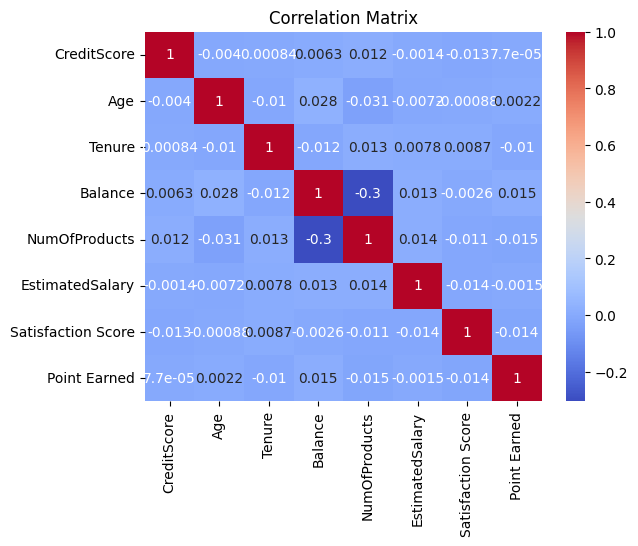

In [23]:
# Correlation matrix
corr = customer_df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


CASE4b: Feature Relationships - Age vs Churn

RESULT: Customers who left the bank are generally of all age groups, there is more to whats causing people to leave the bank, it may not merely be because the the customers ages. 

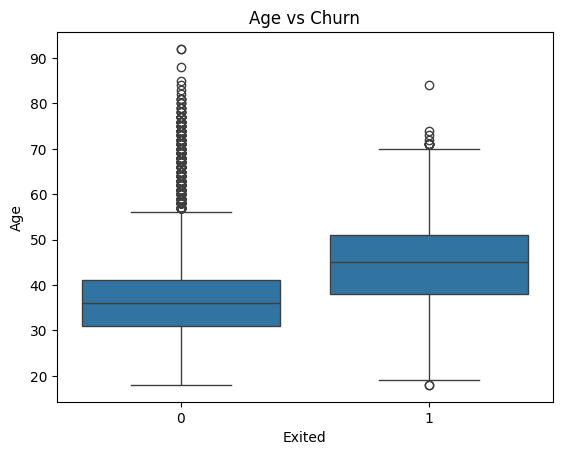

In [24]:
# Age vs. Churn
sns.boxplot(x='Exited', y='Age', data=customer_df)
plt.title('Age vs Churn')
plt.show()


CASE4c: Feature Relationships - Balance vs. Churn

RESULT: Generally customers of all balances have been leaving the bank. 

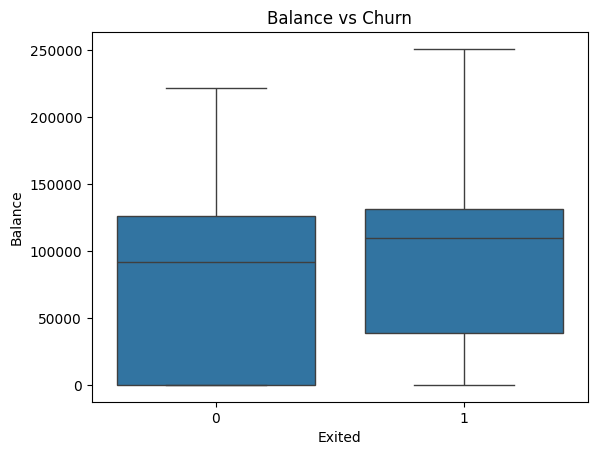

In [25]:
# Balance vs. Churn
sns.boxplot(x='Exited', y='Balance', data=customer_df)
plt.title('Balance vs Churn')
plt.show()

CASE4d: Feature Relationships - CreditScore vs. Churn

RESULT: Customers with high credit score are still within the bank, those with very low credit scores left the bank. 

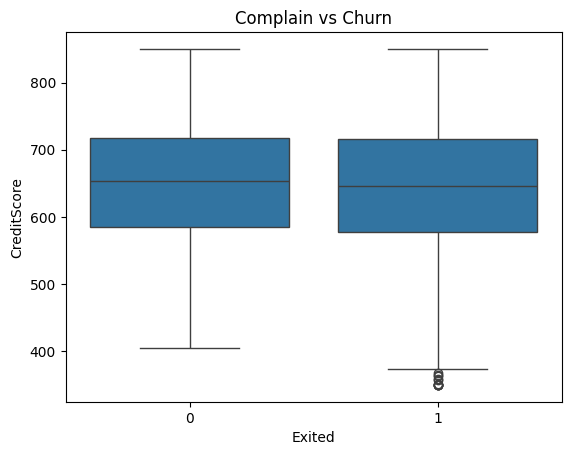

In [30]:
# CreditScore vs. Churn
sns.boxplot(x='Exited', y='CreditScore', data=customer_df)
plt.title('CreditScore vs Churn')
plt.show()

CASE4e: Feature Relationships - Tenure vs. Churn

RESULT: Need for a new column to better visualize if tenure matters in customer churn.

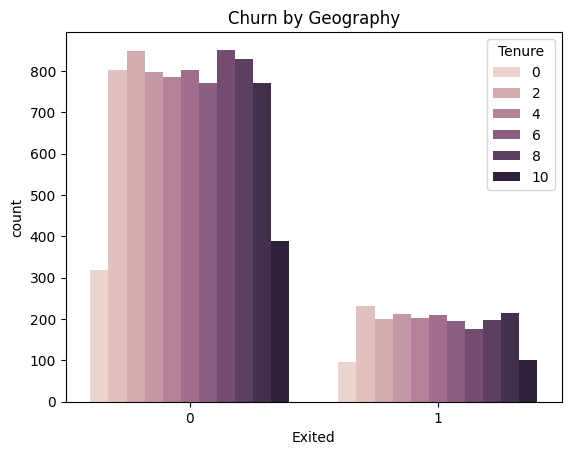

In [32]:
# Balance vs. Churn
sns.countplot(x='Exited', hue='Tenure', data=customer_df)
plt.title('Churn by Geography')
plt.show()